適切なベイジアンネットワークをプログラミングし、購入したときの年齢層、購入していないときの年齢層の確率をそれぞれもとめてみよう。また、女性、40代、CM見た人がどれくらいの確率で商品を買うかを推定しよう。

- pgmpyを用いる
  - Ankan, A., & Panda, A. (2015). pgmpy: Probabilistic graphical models using python. In Proceedings of the 14th Python in Science Conference (SCIPY 2015). Citeseer (Vol. 10).,


In [1]:
#pgmpyをインストール
!pip install pgmpy

     |████████████████████████████████| 327kB 4.7MB/s 


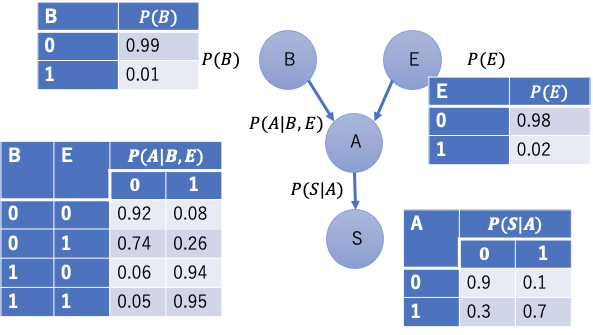

- 涌井良幸, 涌井貞美, “これならわかるベイズ統計学”, ナツメ社, p.160-174, 2012

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD, DiscreteFactor

In [3]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('B', 'A'), ('E', 'A'), ('A', 'S')])

# Defining individual CPDs.
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.99], [0.01]])

cpd_e = TabularCPD(variable='E', variable_card=2, values=[[0.98], [0.02]])

cpd_a = TabularCPD(variable='A', variable_card=2, 
                   values=[[0.92, 0.74, 0.06, 0.05],
                           [0.08, 0.26, 0.94, 0.95]],
                  evidence=['B', 'E'],
                  evidence_card=[2, 2])

cpd_s = TabularCPD(variable='S', variable_card=2, 
                   values=[[0.9, 0.3],
                           [0.1, 0.7]], 
                   evidence=['A'], evidence_card=[2])



# Associating the CPDs with the network
model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [4]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [5]:
print(infer.query(['B'], evidence={'S': 1}))

Eliminating: A: 100%|██████████| 2/2 [00:00<00:00, 258.71it/s]

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.9572 |
+------+----------+
| B(1) |   0.0428 |
+------+----------+


In [6]:
print(infer.query(['E'], evidence={'S': 1}))

Eliminating: B: 100%|██████████| 2/2 [00:00<00:00, 436.36it/s]

+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.9665 |
+------+----------+
| E(1) |   0.0335 |
+------+----------+


# どのWebページが効いていて購入したのか(コンバージョンを測る)
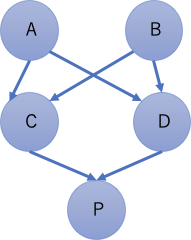


- どのWebページが効いていて購入したか
  - 事象A:ユーザがページAをアクセスした
  - 事象B:ユーザがページBをアクセスした
  - 事象C:ユーザがページCをアクセスした
  - 事象D:ユーザがページDをアクセスした
  - 事象P:ユーザが商品を購入した

- 商品を購入したときに、ページAがのアクセスがされている確率



In [10]:
import pandas as pd

df = pd.read_csv('conversion.csv', index_col=0)
df

,A,B,C,D,P
userid,,,,,
0,1,1,1,1,0
1,0,0,1,0,0
2,1,1,1,1,1
3,0,0,1,0,1
4,1,1,0,0,1
...,...,...,...,...,...
95,1,1,0,0,0
96,1,1,1,1,0
97,1,0,1,0,0


In [11]:
train_data = df[:80]
predict_data = df[80:]

In [12]:
from pgmpy.models import BayesianModel
model = BayesianModel([('A', 'C'), ('A', 'D'), ('B', 'C'),  ('B', 'D'), ('C', 'P'), ('D', 'P'),])
model.fit(train_data)
model.check_model()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


True

In [13]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [14]:
print(infer.query(['A'], evidence={'P': 1}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 323.57it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.5268 |
+------+----------+
| A(1) |   0.4732 |
+------+----------+


In [15]:
print(infer.query(['B'], evidence={'P': 1}))

Eliminating: A: 100%|██████████| 3/3 [00:00<00:00, 203.03it/s]

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.4733 |
+------+----------+
| B(1) |   0.5267 |
+------+----------+


In [16]:
print(infer.query(['C'], evidence={'P': 1}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 218.86it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5498 |
+------+----------+
| C(1) |   0.4502 |
+------+----------+


In [17]:
print(infer.query(['D'], evidence={'P': 1}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 308.51it/s]

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.5440 |
+------+----------+
| D(1) |   0.4560 |
+------+----------+


# ベイジアンネットワーク例
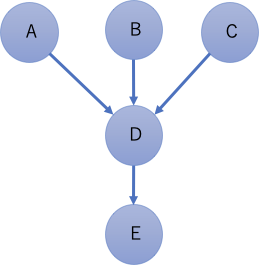

- 事象A: A好きである
- 事象B: B好きである
- 事象C: C好きである
- 事象D: お店Dに来店する
- 事象E: 商品Eを購入する



In [18]:
import pandas as pd

df = pd.read_csv('sample.csv', index_col=0)
df

,A,B,C,D,E
0,1,1,1,1,0
1,1,1,0,1,0
2,0,0,0,1,1
3,0,1,1,0,0
4,1,0,0,0,1
...,...,...,...,...,...
95,1,1,1,0,0
96,0,0,1,1,0
97,0,1,1,0,1
98,1,1,0,1,1


In [19]:
train_data = df[:80]
predict_data = df[80:]

In [20]:
from pgmpy.models import BayesianModel
model = BayesianModel([('A', 'D'), ('B', 'D'),  ('C', 'D'), ('D', 'E')])
model.fit(train_data)
model.check_model()

True

In [21]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [22]:
print(infer.query(['C'], evidence={'E': 1}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 296.39it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.4746 |
+------+----------+
| C(1) |   0.5254 |
+------+----------+


In [23]:
predict_data = predict_data.copy()
predict_data.drop('B', axis=1, inplace=True)

In [24]:
predict_data

,A,C,D,E
80,0,1,0,0
81,0,0,1,1
82,1,1,0,1
83,0,1,0,1
84,1,1,0,0
85,1,0,1,1
86,1,1,1,0
87,0,0,1,0
88,0,1,1,1
89,1,1,1,1


In [25]:
predict_data[9:10]

,A,C,D,E
89,1,1,1,1


In [26]:
model.predict_probability(predict_data[9:10])

,B_0,B_1
89,0.497703,0.502297


# 年齢、性別、CMを観たかで商品購入を予測
- sex: Male:0/Female:1
- age:
  - 10s:1
  - 20s:2
  - 30s:3
  - 40s:4
  - 50s:5
  - 60s:6
- CM: Not seen:0/ Seen:1
- purchase: unpurchased:0 /Purchased01

In [27]:
import pandas as pd

df = pd.read_csv('conversion_task.csv', index_col=0)
df

,sex,age,CM,purchase
userid,,,,
0,0,4,0,0
1,0,5,0,0
2,1,1,0,0
3,1,6,0,0
4,0,3,0,1
...,...,...,...,...
95,1,5,0,0
96,1,2,0,1
97,0,4,1,1


In [28]:
from pgmpy.models import BayesianModel
###############
# ここを埋める
###############
train_data = df[:80]
predict_data = df[80:]
model = BayesianModel([('age', 'purchase'), ('sex', 'purchase'),  ('CM', 'purchase'),])
model.fit(train_data)
model.check_model()

True

In [29]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [30]:
###############
# ここを埋める
###############
print(infer.query(['age'], evidence={'purchase': 1}))

Eliminating: sex: 100%|██████████| 2/2 [00:00<00:00, 298.55it/s]

+--------+------------+
| age    |   phi(age) |
+========+============+
| age(1) |     0.0720 |
+--------+------------+
| age(2) |     0.1397 |
+--------+------------+
| age(3) |     0.1879 |
+--------+------------+
| age(4) |     0.2202 |
+--------+------------+
| age(5) |     0.1852 |
+--------+------------+
| age(6) |     0.1950 |
+--------+------------+


In [31]:
import pandas as pd
query = pd.DataFrame([[1,4,1]], columns=['sex', 'age', 'CM'])
query

,sex,age,CM
0,1,4,1


In [32]:
###############
# ここを埋める
###############
model.predict_probability(query)

,purchase_0,purchase_1
0,0.0,1.0
